# Guess state

Given the shapefile of a city (or police district), guess which state it is in.

# States boundaries

For this task, we will first need to retrieve the state boundaries of USA

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd

from cpe_help import list_departments
from cpe_help.util import crs
from cpe_help.util.path import DATA_DIR

In [2]:
states = gpd.read_file(str(DATA_DIR / 'census' / '2016' / 'state_boundaries'))
states = states.to_crs(crs.epsg4326)

In [3]:
states.crs

{'init': 'epsg:4326', 'no_defs': True}

In [4]:
states

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265597146,489902816,+38.6472854,-080.6183274,"POLYGON ((-81.747254 39.095379, -81.746354 39...."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138924199212,31386038155,+28.4574302,-082.4091478,"(POLYGON ((-82.986238 24.61065, -82.987477 24...."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143788697679,6206693598,+40.1028754,-089.1526108,"POLYGON ((-91.185295 40.637803, -91.1751 40.64..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232257655,18929176411,+46.3158148,-094.1996628,"POLYGON ((-96.784381 46.63050399999999, -96.78..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25147754905,6983312282,+38.9466584,-076.6744939,"POLYGON ((-77.45880799999999 39.22027, -77.458..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677898725,1323551636,+41.5974187,-071.5272723,(POLYGON ((-71.67264399999999 41.1342919999999...
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214042908012,2398669593,+44.3484222,-114.5588538,"POLYGON ((-116.899711 44.840609, -116.89967 44..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23187396994,1028678842,+43.6726907,-071.5843145,"POLYGON ((-72.329899 43.600214, -72.329838 43...."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125921301190,13470062955,+35.5397100,-079.1308636,"POLYGON ((-82.41673800000001 36.072827, -82.41..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23873467535,1031124865,+44.0604795,-072.6733274,"POLYGON ((-73.313283 44.26413, -73.312741 44.2..."


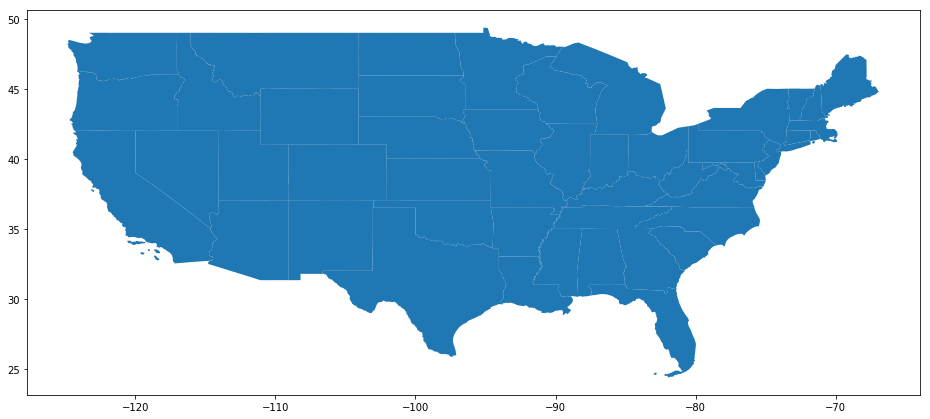

In [5]:
# drop Alaska, Hawaii and territories
states.drop([31, 34, 35, 36, 40, 41, 49]).plot(figsize=(16, 12))

# Police departments

For this prototype, we will take one example to find the state.

In [6]:
dept = list_departments()[0]
dept

Department('24-00098')

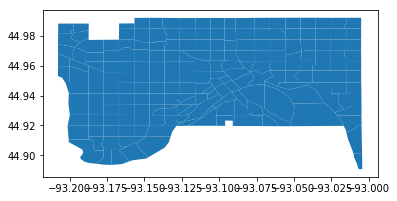

In [7]:
districts = gpd.read_file(str(dept.dir / 'preprocessed' / 'shapefiles'))  # dept.read_police_boundaries()
districts.plot()

In [8]:
dept_shape = districts.unary_union

# Guess the state

To guess the state, we find states that intersect with the shape. If there's one state only, it's okay. If there's more than one state, things have gone wild.

In [9]:
intersecting = [s for s, g in states.geometry.iteritems() if g.intersects(dept_shape)]
intersecting

[3]

In [10]:
states.loc[3]

REGION                                                      2
DIVISION                                                    4
STATEFP                                                    27
STATENS                                              00662849
GEOID                                                      27
STUSPS                                                     MN
NAME                                                Minnesota
LSAD                                                       00
MTFCC                                                   G4000
FUNCSTAT                                                    A
ALAND                                            206232257655
AWATER                                            18929176411
INTPTLAT                                          +46.3158148
INTPTLON                                         -094.1996628
geometry    POLYGON ((-96.784381 46.63050399999999, -96.78...
Name: 3, dtype: object

So we are at Minnesota!

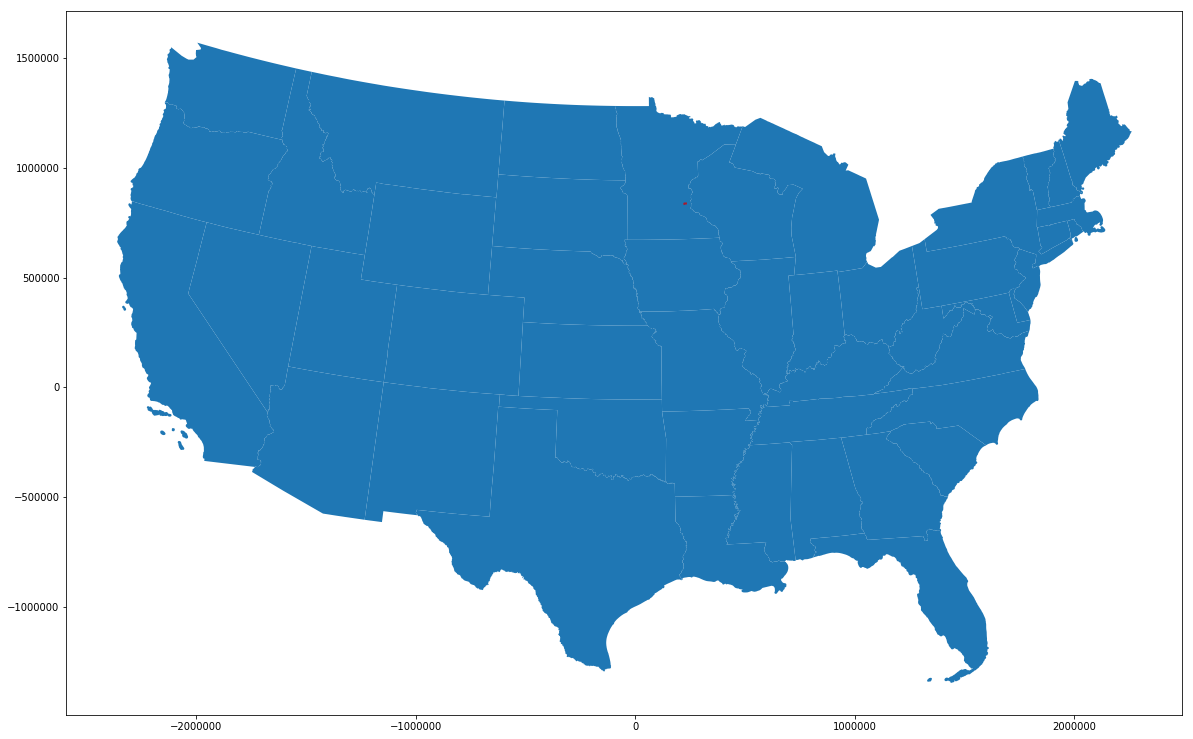

In [11]:
fig, ax = plt.subplots(figsize=(20, 16))

ax.set_aspect('equal')

proj = {'init': 'esri:102003'}
states.to_crs(proj).drop([31, 34, 35, 36, 40, 41, 49]).plot(ax=ax)
districts.to_crs(proj).plot(ax=ax, color='red')

In [12]:
# that little speck of red is in minnesota indeed